In [3]:
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
import * as Plot from "npm:@observablehq/plot";
import { DOMParser, SVGElement } from "npm:linkedom";
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

const document = new DOMParser().parseFromString(`<!DOCTYPE html><html lang="en"></html>`,"text/html",);
const randomNumbers: number[] = Array.from({ length: 100 },() => Math.floor(Math.random() * 11));
const counts: number[] = Array(11).fill(0);
randomNumbers.forEach(num => counts[num]++);
const distributionData = counts.map((count, value) => ({value: value.toString(),count}));
const randomColor = () => '#' + Math.floor(Math.random()*16777215).toString(16).padStart(6, '0');
const colorMap = Array.from({length: 11}, (_, i) => randomColor());

// Гістограма
await display(Plot.plot({
    title: "Розподіл випадкових чисел (0-10)", marginLeft: 60,
    x: {label: "Значення", type: "band", domain: Array.from({length: 11}, (_, i) => i.toString())},
    y: {label: "Кількість", grid: true, ticks: 10},
    marks: [Plot.barY(distributionData, {x: "value", y: "count", fill: d => colorMap[parseInt(d.value)]}), Plot.ruleY([0])],
    color: {legend: true, scheme: colorMap},
    width: 800, height: 400, document,
}));



Розподіл випадкових чисел (0-10) 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ↑ Кількість 0 1 2 3 4 5 6 7 8 9 10 Значення

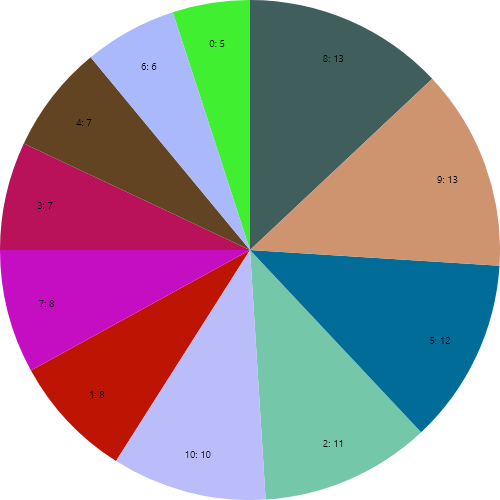

In [4]:
// Додаємо кругову діаграму
const width = 500;
const height = 500;
const radius = Math.min(width, height) / 2;

// Створюємо функцію pie
const pie = d3.pie().value(d => d.count);

// Створюємо генератор дуг для секторів
const arc = d3.arc()
    .innerRadius(0)
    .outerRadius(radius);

// Створюємо генератор дуг для міток
const labelArc = d3.arc()
    .innerRadius(radius - 40)
    .outerRadius(radius - 40);

// Створюємо canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Переносимо початок координат в центр кругової діаграми
ctx.translate(width / 2, height / 2);

// Малюємо кругову діаграму
pie(distributionData).forEach((d, i) => {
    // Малюємо сектор
    ctx.beginPath();
    arc.context(ctx)(d);
    ctx.fillStyle = colorMap[parseInt(d.data.value)];
    ctx.fill();

    // Малюємо мітку
    ctx.fillStyle = "#000"; // Колір мітки
    ctx.textAlign = "center";
    ctx.textBaseline = "middle";

    const centroid = labelArc.centroid(d);
    ctx.fillText(`${d.data.value}: ${d.data.count}`, centroid[0], centroid[1]);
});

// Відображаємо canvas
await display(canvas);